<a href="https://colab.research.google.com/github/Varshini151205/ML/blob/main/Assignment_1(ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


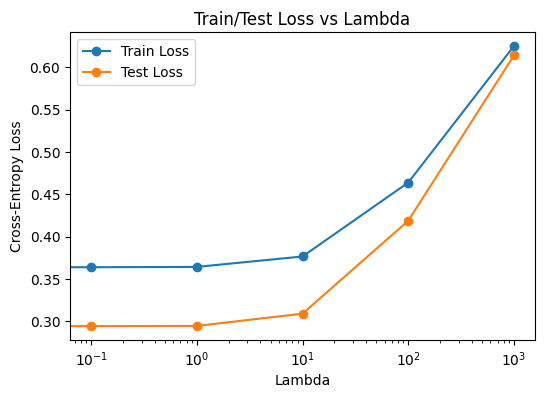

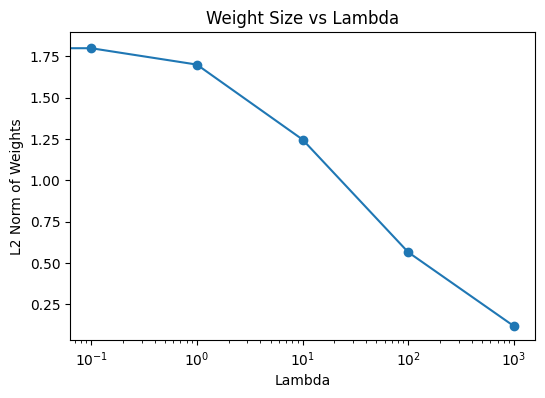

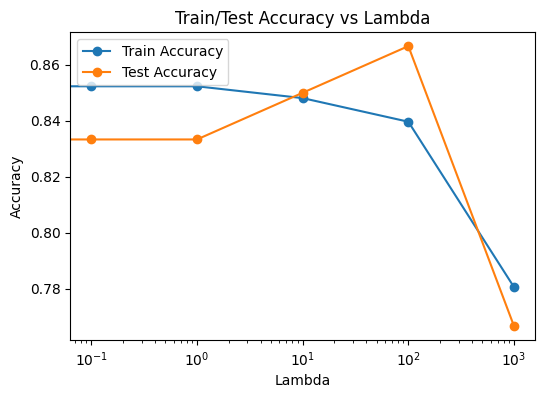

In [26]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss, accuracy_score
import matplotlib.pyplot as plt

df.to_csv('/content/drive/MyDrive/ml lab /processed.cleveland.csv', index=False)
df = pd.read_csv('/content/drive/MyDrive/ml lab /processed.cleveland.csv')

columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]
df.columns = columns

df = df.replace('?', np.nan)
df = df.dropna()

df = df.astype(float)

df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

X = df.drop('target', axis=1).values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lambdas = [0, 0.1, 1, 10, 100, 1000]
train_losses, test_losses, l2_norms, train_acc, test_acc = [], [], [], [], []

for lam in lambdas:
    C = 1e12 if lam == 0 else 1/lam
    model = LogisticRegression(penalty='l2', C=C, solver='lbfgs', max_iter=5000)
    model.fit(X_train_scaled, y_train)

    y_train_prob = model.predict_proba(X_train_scaled)
    y_test_prob = model.predict_proba(X_test_scaled)

    train_losses.append(log_loss(y_train, y_train_prob))
    test_losses.append(log_loss(y_test, y_test_prob))
    l2_norms.append(np.linalg.norm(model.coef_))
    train_acc.append(model.score(X_train_scaled, y_train))
    test_acc.append(model.score(X_test_scaled, y_test))

plt.figure(figsize=(6,4))
plt.plot(lambdas, train_losses, marker='o', label='Train Loss')
plt.plot(lambdas, test_losses, marker='o', label='Test Loss')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Cross-Entropy Loss')
plt.title('Train/Test Loss vs Lambda')
plt.legend()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(lambdas, l2_norms, marker='o')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('L2 Norm of Weights')
plt.title('Weight Size vs Lambda')
plt.show()

plt.figure(figsize=(6,4))
plt.plot(lambdas, train_acc, marker='o', label='Train Accuracy')
plt.plot(lambdas, test_acc, marker='o', label='Test Accuracy')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Accuracy')
plt.title('Train/Test Accuracy vs Lambda')
plt.legend()
plt.show()


In [28]:
import numpy as np

def gaussian_basis(X, num_bases=5, sigma=1.0, feature_range=(-10, 10)):

    num_samples, num_features = X.shape
    means = np.linspace(feature_range[0], feature_range[1], num_bases)

    X_new = []

    for i in range(num_features):
        feature = X[:, i][:, np.newaxis]
        gaussians = np.exp(- (feature - means)**2 / (2 * sigma**2))
        X_new.append(gaussians)

    X_transformed = np.hstack(X_new)
    return X_transformed
sigma_values = [0.1, 0.5, 1, 5, 10]

for sigma in sigma_values:
    X_train_gauss = gaussian_basis(X_train_scaled, num_bases=5, sigma=sigma)
    X_test_gauss = gaussian_basis(X_test_scaled, num_bases=5, sigma=sigma)

    print(f"Sigma={sigma}:")
    print("Transformed X_train shape:", X_train_gauss.shape)
    print("Transformed X_test shape:", X_test_gauss.shape)
    print()


Sigma=0.1:
Transformed X_train shape: (237, 65)
Transformed X_test shape: (60, 65)

Sigma=0.5:
Transformed X_train shape: (237, 65)
Transformed X_test shape: (60, 65)

Sigma=1:
Transformed X_train shape: (237, 65)
Transformed X_test shape: (60, 65)

Sigma=5:
Transformed X_train shape: (237, 65)
Transformed X_test shape: (60, 65)

Sigma=10:
Transformed X_train shape: (237, 65)
Transformed X_test shape: (60, 65)



In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

model_baseline = LogisticRegression(penalty='l2', C=1e12, solver='lbfgs', max_iter=5000)
model_baseline.fit(X_train_scaled, y_train)

y_train_prob_baseline = model_baseline.predict_proba(X_train_scaled)
y_test_prob_baseline = model_baseline.predict_proba(X_test_scaled)

baseline_train_loss = log_loss(y_train, y_train_prob_baseline)
baseline_test_loss = log_loss(y_test, y_test_prob_baseline)

print("Baseline Train Loss:", baseline_train_loss)
print("Baseline Test Loss:", baseline_test_loss)


Baseline Train Loss: 0.3637750464586583
Baseline Test Loss: 0.2942120270706628


In [30]:
import matplotlib.pyplot as plt

sigma_values = [0.1, 0.5, 1, 5, 10]
train_losses_gauss = []
test_losses_gauss = []

for sigma in sigma_values:

    X_train_gauss = gaussian_basis(X_train_scaled, num_bases=5, sigma=sigma)
    X_test_gauss = gaussian_basis(X_test_scaled, num_bases=5, sigma=sigma)

    # Logistic regression without regularization
    model = LogisticRegression(penalty='l2', C=1e12, solver='lbfgs', max_iter=5000)
    model.fit(X_train_gauss, y_train)

    #cross-entropy loss
    y_train_prob = model.predict_proba(X_train_gauss)
    y_test_prob = model.predict_proba(X_test_gauss)

    train_losses_gauss.append(log_loss(y_train, y_train_prob))
    test_losses_gauss.append(log_loss(y_test, y_test_prob))


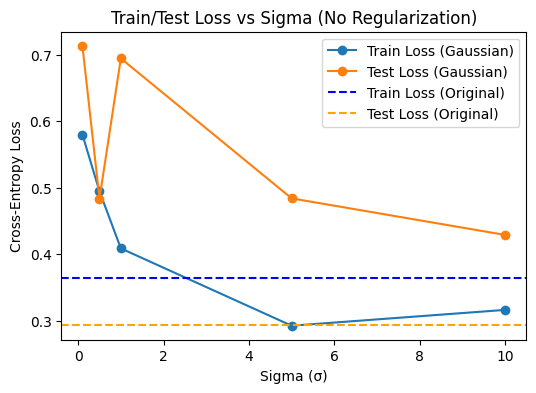

In [31]:
plt.figure(figsize=(6,4))
plt.plot(sigma_values, train_losses_gauss, marker='o', label='Train Loss (Gaussian)')
plt.plot(sigma_values, test_losses_gauss, marker='o', label='Test Loss (Gaussian)')

# Add baseline constant lines
plt.axhline(y=baseline_train_loss, color='blue', linestyle='--', label='Train Loss (Original)')
plt.axhline(y=baseline_test_loss, color='orange', linestyle='--', label='Test Loss (Original)')

plt.xlabel('Sigma (σ)')
plt.ylabel('Cross-Entropy Loss')
plt.title('Train/Test Loss vs Sigma (No Regularization)')
plt.legend()
plt.show()


g


In [32]:

sigma_values = [0.1, 0.5, 1, 5, 10]

# Transform train/test data using all σ
X_train_all = np.hstack([gaussian_basis(X_train_scaled, num_bases=5, sigma=s) for s in sigma_values])
X_test_all  = np.hstack([gaussian_basis(X_test_scaled, num_bases=5, sigma=s) for s in sigma_values])

print("Combined features shape (train):", X_train_all.shape)
print("Combined features shape (test):", X_test_all.shape)


Combined features shape (train): (237, 325)
Combined features shape (test): (60, 325)


In [33]:
lambdas = [0, 0.1, 1, 10, 100, 1000, 10000]

train_losses, test_losses, l2_norms, sigma_l2_norms = [], [], [], []

for lam in lambdas:
    C = 1e12 if lam == 0 else 1/lam
    model = LogisticRegression(penalty='l2', C=C, solver='lbfgs', max_iter=5000)
    model.fit(X_train_all, y_train)

    # Cross-entropy loss
    y_train_prob = model.predict_proba(X_train_all)
    y_test_prob  = model.predict_proba(X_test_all)
    train_losses.append(log_loss(y_train, y_train_prob))
    test_losses.append(log_loss(y_test, y_test_prob))

    # L2 norm of full weight vector
    w = model.coef_[0]
    l2_norms.append(np.linalg.norm(w))

    # L2 norm per σ (5 groups)
    sigma_norms = []
    start = 0
    num_features = X_train_scaled.shape[1] * 5
    for _ in sigma_values:
        end = start + num_features
        sigma_norms.append(np.linalg.norm(w[start:end]))
        start = end
    sigma_l2_norms.append(sigma_norms)


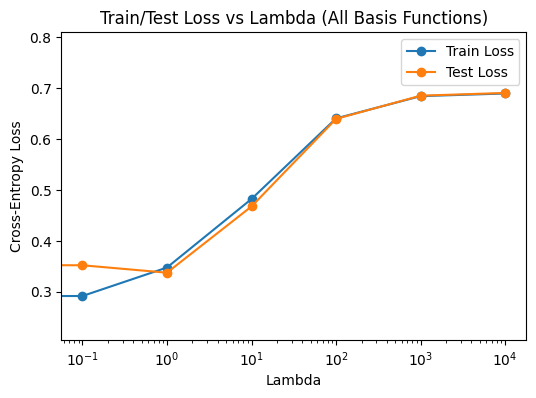

In [34]:
import matplotlib.pyplot as plt
train_losses = np.array(train_losses)
test_losses = np.array(test_losses)

plt.figure(figsize=(6,4))
plt.plot(lambdas, train_losses, marker='o', label='Train Loss')
plt.plot(lambdas, test_losses, marker='o', label='Test Loss')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Cross-Entropy Loss')
plt.title('Train/Test Loss vs Lambda (All Basis Functions)')
plt.legend()
plt.show()


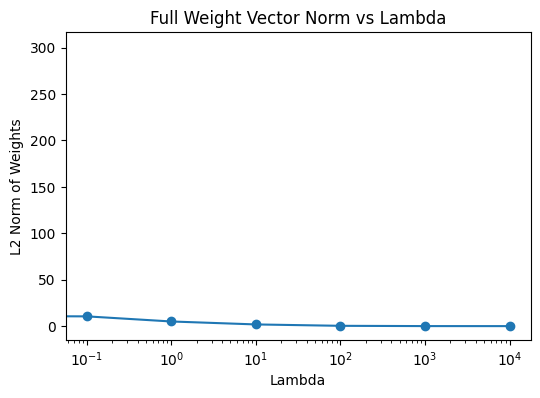

In [35]:
plt.figure(figsize=(6,4))
plt.plot(lambdas, l2_norms, marker='o')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('L2 Norm of Weights')
plt.title('Full Weight Vector Norm vs Lambda')
plt.show()


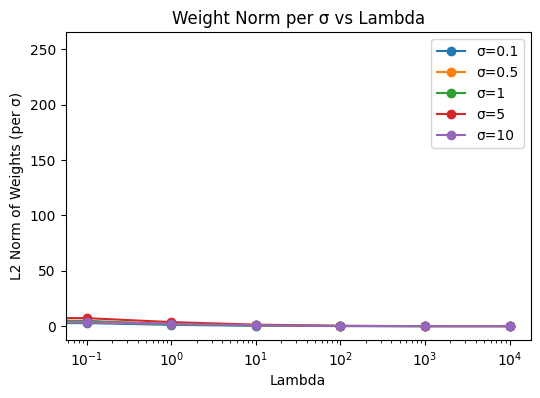

In [36]:
sigma_l2_norms = np.array(sigma_l2_norms)

plt.figure(figsize=(6,4))
for i, sigma in enumerate(sigma_values):
    plt.plot(lambdas, sigma_l2_norms[:, i], marker='o', label=f'σ={sigma}')

plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('L2 Norm of Weights (per σ)')
plt.title('Weight Norm per σ vs Lambda')
plt.legend()
plt.show()


**Experiment on any complex datasets to demonstrate the Linear REGRESSION and its versions**

Linear Regression (California Housing):
Train MSE: 0.5179331255246699
Test MSE: 0.5558915986952442
Train R2: 0.6125511913966952
Test R2: 0.575787706032451


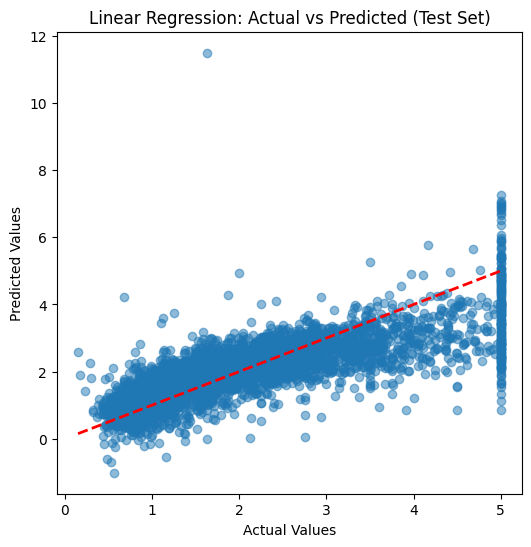

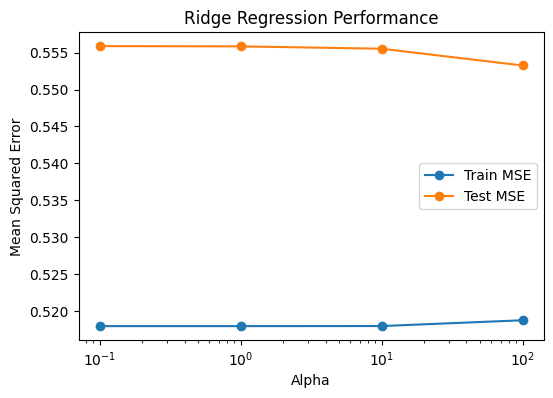

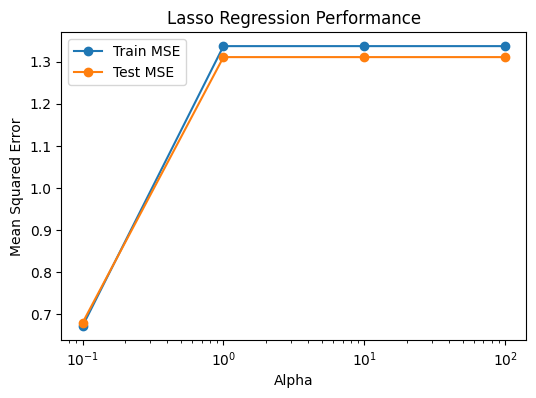

In [39]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

california = fetch_california_housing(as_frame=True)
X = california.data
y = california.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_train_pred = lr.predict(X_train_scaled)
y_test_pred  = lr.predict(X_test_scaled)

print("Linear Regression (California Housing):")
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Train R2:", r2_score(y_train, y_train_pred))
print("Test R2:", r2_score(y_test, y_test_pred))

#Plot predicted vs actual values
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs Predicted (Test Set)")
plt.show()

# Ridge and Lasso Regression
alphas = [0.1, 1, 10, 100]
train_mse_ridge, test_mse_ridge = [], []
train_mse_lasso, test_mse_lasso = [], []

for alpha in alphas:
    # Ridge
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    train_mse_ridge.append(mean_squared_error(y_train, ridge.predict(X_train_scaled)))
    test_mse_ridge.append(mean_squared_error(y_test, ridge.predict(X_test_scaled)))

    # Lasso
    lasso = Lasso(alpha=alpha, max_iter=5000)
    lasso.fit(X_train_scaled, y_train)
    train_mse_lasso.append(mean_squared_error(y_train, lasso.predict(X_train_scaled)))
    test_mse_lasso.append(mean_squared_error(y_test, lasso.predict(X_test_scaled)))

# Plot Ridge Regression MSE
plt.figure(figsize=(6,4))
plt.plot(alphas, train_mse_ridge, marker='o', label='Train MSE')
plt.plot(alphas, test_mse_ridge, marker='o', label='Test MSE')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Ridge Regression Performance')
plt.legend()
plt.show()

# Plot Lasso Regression MSE
plt.figure(figsize=(6,4))
plt.plot(alphas, train_mse_lasso, marker='o', label='Train MSE')
plt.plot(alphas, test_mse_lasso, marker='o', label='Test MSE')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Lasso Regression Performance')
plt.legend()
plt.show()


**logistic regression (CLASSIFICATION) along with complete data preprocessing steps.**

In [42]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9736842105263158
Confusion Matrix:
 [[41  2]
 [ 1 70]]
